In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import sqlite3

In [74]:
con=sqlite3.connect(r"C:\Users\visha\Downloads\password_resources\password_data.sqlite")

In [75]:
data=pd.read_sql_query('select* From Users',con)

In [76]:
data.shape

(100000, 3)

In [77]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [78]:
data.drop(['index'],axis=1,inplace=True)

In [79]:
data.head(2)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1


In [80]:
data.duplicated().sum()

0

In [81]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [82]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [83]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [84]:
data['password'][0]

'zxe870819'

In [85]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [86]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [87]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [88]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [89]:
data[data['password'].str.isupper()].shape

(1506, 2)

In [90]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [91]:
data[data['password'].str.isalpha()].shape

(50, 2)

In [92]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [93]:
data[data['password'].str.isalnum()].shape

(97203, 2)

In [94]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [95]:
import string

In [96]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [97]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [98]:
data['password'].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [99]:
data[data['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [100]:
len(data['password'][0])

9

In [101]:
data["length"]=data['password'].str.len()

In [102]:
def lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [103]:
def uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [104]:
def numerical(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [105]:
data["lower"]=np.round(data['password'].apply(lowercase),3)

In [106]:
data["upper"]=np.round(data['password'].apply(uppercase),3)

In [107]:
data["numerical"]=np.round(data['password'].apply(numerical),3)

In [108]:
data.head(3)

,password,strength,length,lower,upper,numerical
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [109]:
def special_case(row):
    special_char=[]
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_char.append(char)
    return len(special_char)

In [110]:
data["special char"]=np.round(data['password'].apply(special_case),3)

In [111]:
data.head(5)

,password,strength,length,lower,upper,numerical,special char
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [112]:
data["special freq"]=data["special char"]/data['length']

In [113]:
data.head(5)

,password,strength,length,lower,upper,numerical,special char,special freq
0,zxe870819,1,9,0.333,0.0,0.667,0,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0,0.000000


In [114]:
data.columns

Index(['password', 'strength', 'length', 'lower', 'upper', 'numerical',
       'special char', 'special freq'],
      dtype='object')

In [115]:
data[['length','strength']].groupby(['strength']).agg(['min','mean','max','median'])

length                       
            min       mean  max median
strength                              
0             1   6.550947    7    7.0
1             8   9.611074   13    9.0
2            14  15.953421  220   16.0

In [116]:
cols=['password', 'strength', 'length', 'lower', 'upper', 'numerical',
       'special char', 'special freq']
for col in cols:
    print(col)
    print(data[['length','strength']].groupby(['strength']).agg(['min','mean','max','median']))
    print('/n')

password
         length                       
            min       mean  max median
strength                              
0             1   6.550947    7    7.0
1             8   9.611074   13    9.0
2            14  15.953421  220   16.0
/n
strength
         length                       
            min       mean  max median
strength                              
0             1   6.550947    7    7.0
1             8   9.611074   13    9.0
2            14  15.953421  220   16.0
/n
length
         length                       
            min       mean  max median
strength                              
0             1   6.550947    7    7.0
1             8   9.611074   13    9.0
2            14  15.953421  220   16.0
/n
lower
         length                       
            min       mean  max median
strength                              
0             1   6.550947    7    7.0
1             8   9.611074   13    9.0
2            14  15.953421  220   16.0
/n
upper
         length

In [117]:
data.columns

Index(['password', 'strength', 'length', 'lower', 'upper', 'numerical',
       'special char', 'special freq'],
      dtype='object')

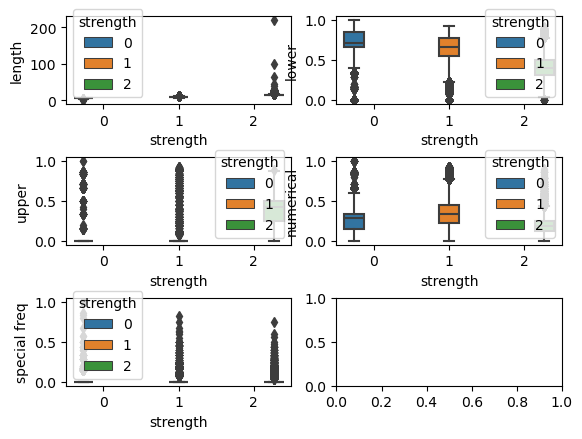

In [118]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2)
sns.boxplot(x='strength', y='length',hue='strength',ax=ax1,data=data)
sns.boxplot(x='strength', y='lower',hue='strength',ax=ax2,data=data)
sns.boxplot(x='strength', y='upper',hue='strength',ax=ax3,data=data)
sns.boxplot(x='strength', y='numerical',hue='strength',ax=ax4,data=data)
sns.boxplot(x='strength', y='special freq',hue='strength',ax=ax5,data=data)
plt.subplots_adjust(hspace=0.6)

In [119]:
def get_dist(data,feature):
    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature,data=data)
    plt.subplot(1,2,2)

    sns.distplot(data[data['strength']==0][feature],color='red',label='0',hist=False)
    sns.distplot(data[data['strength']==1][feature],color='blue',label='0',hist=False)
    sns.distplot(data[data['strength']==2][feature],color='orange',label='0',hist=False)


In [120]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

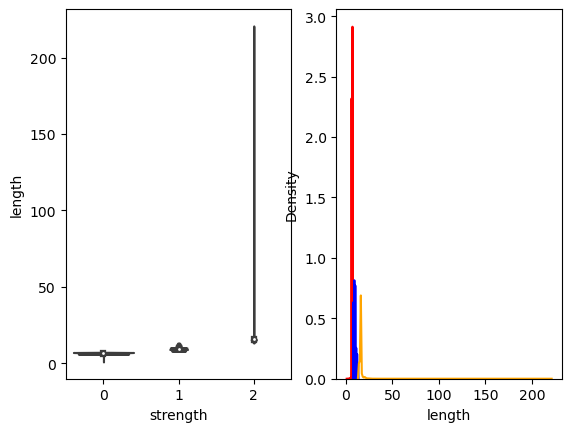

In [121]:
get_dist(data,'length')

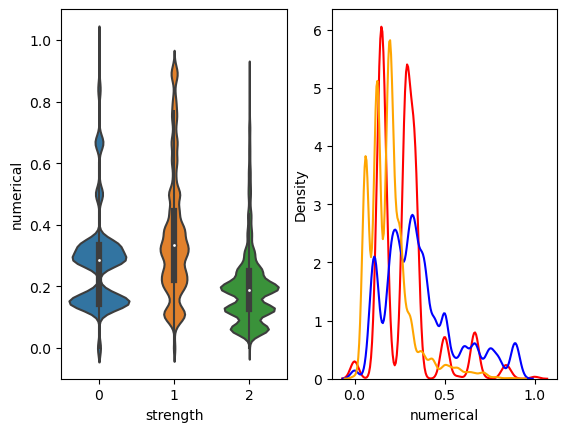

In [122]:
get_dist(data,'numerical')

In [123]:
df=data.sample(frac=1)

In [124]:
df

,password,strength,length,lower,upper,numerical,special char,special freq
44958,Sido mukti,1,10,0.800,0.100,0.000,1,0.1
43567,zilxis55,1,8,0.750,0.000,0.250,0,0.0
38850,trinicita1,1,10,0.900,0.000,0.100,0,0.0
15076,nAJnPLDg1MgsVTAZ,2,16,0.312,0.625,0.062,0,0.0
78312,tech1452,1,8,0.500,0.000,0.500,0,0.0
...,...,...,...,...,...,...,...,...
35485,senac2009,1,9,0.556,0.000,0.444,0,0.0
56505,marcial28,1,9,0.778,0.000,0.222,0,0.0
20385,ubaduzu850,1,10,0.700,0.000,0.300,0,0.0
44392,ijeqshlvu6,1,10,0.900,0.000,0.100,0,0.0


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
x=list(df['password'])

In [127]:
vector = TfidfVectorizer(analyzer='char')

In [128]:
X=vector.fit_transform(x)

In [129]:
X.shape

(100000, 99)

In [130]:
len(vector.get_feature_names_out())

99

In [131]:
df2=pd.DataFrame(X.toarray(),columns=vector.get_feature_names_out())

In [132]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.708301,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
df2.columns

Index(['', '', '', '', '', '', '', ' ', '!', '#', '$', '%', '&', '(',
       ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|',
       '}', '~', '¡', '¨', '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä',
       'æ', 'ç', 'é', 'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ',
       '›'],
      dtype='object')

In [139]:

df2['length'] = df['length']

df2['special freq'] = df['special freq']


In [140]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,special freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.708301,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.043478
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.000000
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.000000
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.000000
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.000000


In [141]:
from sklearn.model_selection import train_test_split

In [144]:
y=df['strength']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [146]:
X_train.shape

(80000, 101)

In [147]:
y_train.shape

(80000,)

In [148]:
from sklearn.linear_model import LogisticRegression

In [151]:
clf=LogisticRegression(multi_class="multinomial")

In [152]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [154]:
y_pred=clf.predict(X_test)

In [155]:
y_pred

array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

In [156]:
from collections import Counter

In [157]:
Counter(y_pred)

Counter({1: 16782, 2: 1711, 0: 1507})

In [158]:
password='%@123abcd'

In [159]:
sample_arr=np.array([password])

In [163]:
sample_matrix=vector.transform(sample_arr)

In [166]:
sample_matrix.toarray().shape

(1, 99)

In [168]:
password

'%@123abcd'

In [170]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [171]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [172]:
np.append(sample_matrix.toarray(),(9,0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [174]:
new_matrix=np.append(sample_matrix.toarray(),(9,0.444)).reshape(1,101)

In [175]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [178]:
def predict():
    password=input('enter the password')
    sample_arr=np.array([password])
    sample_matrix=vector.transform(sample_arr)

    length_pass=len(password)
    length_normalised_lowercase=len([char for char in password if char.islower()])/len(password)
    new_matrix2=np.append(sample_matrix.toarray(), (length_pass,length_normalised_lowercase)).reshape(1,101)
    result=clf.predict(new_matrix)

    if result==0:
        return ('password is weak')
    elif result==1:
        return ('password is normal')
    else:
        return('password is strong')

In [179]:
predict()

enter the password fvzkd,foi,


'password is weak'

In [180]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [181]:
accuracy_score(y_test,y_pred)

0.81025

In [182]:
confusion_matrix(y_test,y_pred)

array([[  790,  1878,     0],
       [  656, 13937,   233],
       [   61,   967,  1478]], dtype=int64)